#### 아래 데이터는 2019년 4월 1일부터 15일까지 모바일 웹 사용자 패널의 로그기록이다. 아래 과정에 따라 분석을 진행하시오.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./data/xView_201904_01_15.csv")

#### Time stamp 전처리 및 요일/시간 변수 생성 

In [2]:
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
data['Weekday'] = data['Time Stamp'].dt.weekday
data['Hour'] = data['Time Stamp'].dt.hour

data.head()

,KMID,Time Stamp,URL,Full Title,Weekday,Hour
0,KM00002,2019-04-01 13:09:38,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13
1,KM00002,2019-04-02 12:10:28,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12
2,KM00002,2019-04-02 15:27:21,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15
3,KM00002,2019-04-02 15:27:34,https://papago.naver.com/,Papago,1,15
4,KM00002,2019-04-03 12:03:12,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12


#### Session ID 생성

In [3]:
data.sort_values(by=['KMID','Time Stamp'],inplace=True)

In [4]:
def add_newsession(df):
    df['Newsession'] = df['Time Stamp'].diff()>pd.Timedelta(minutes=20)
    df['Newsession'].iloc[0] = True
    return df
    
data = data.groupby('KMID').apply(add_newsession)    

In [5]:
data['SessionID'] = data['Newsession'].cumsum()

#### Session time 생성
- 각 session의 최대 시간과 최소 시간의 차이를 계산하여 초 단위로  SessionTime 변수 생성

In [6]:
data_session=data.groupby('SessionID').first()

In [9]:
data_session

,KMID,Time Stamp,URL,Full Title,Weekday,Hour,Newsession
SessionID,,,,,,,
1,KM00002,2019-04-01 13:09:38,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13,True
2,KM00002,2019-04-02 12:10:28,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12,True
3,KM00002,2019-04-02 15:27:21,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15,True
4,KM00002,2019-04-03 12:03:12,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12,True
5,KM00002,2019-04-03 12:25:58,https://m.search.naver.com/search.naver?query=...,회송행 : 네이버 통합검색,2,12,True
...,...,...,...,...,...,...,...
89379,KM17248,2019-04-11 10:36:21,https://m.search.naver.com/search.naver?where=...,옥션 싱글데이 : 네이버 통합검색,3,10,True
89380,KM17248,2019-04-11 13:41:23,https://m.search.naver.com/search.naver?query=...,갈현동 날씨 : 네이버 통합검색,3,13,True
89381,KM17248,2019-04-13 23:54:57,https://m.news.naver.com/read.nhn?mode=LSD&mid...,'세월호 5주기' 추모물결…광화문 수놓은 거대한 노란 리본(종합),5,23,True


In [8]:
data_session['SessionTime']=data.groupby('SessionID')['Time Stamp'].max()-data.groupby('SessionID')['Time Stamp'].min()

In [9]:
data_session['SessionTime']=data_session['SessionTime'].dt.total_seconds()

- SessionID를 index에서 변수로 변환
- Time Stamp를 index로 설정

In [10]:
data_session=data_session.reset_index()
data_session=data_session.set_index('Time Stamp')

In [11]:
data_session

,SessionID,KMID,URL,Full Title,Weekday,Hour,Newsession,SessionTime
Time Stamp,,,,,,,,
2019-04-01 13:09:38,1,KM00002,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,0,13,True,0.0
2019-04-02 12:10:28,2,KM00002,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,1,12,True,0.0
2019-04-02 15:27:21,3,KM00002,https://m.search.naver.com/search.naver?query=...,파파고 : 네이버 통합검색,1,15,True,13.0
2019-04-03 12:03:12,4,KM00002,https://m.search.naver.com/search.naver?query=...,한양대학교 날씨 : 네이버 통합검색,2,12,True,0.0
2019-04-03 12:25:58,5,KM00002,https://m.search.naver.com/search.naver?query=...,회송행 : 네이버 통합검색,2,12,True,0.0
...,...,...,...,...,...,...,...,...
2019-04-11 10:36:21,89379,KM17248,https://m.search.naver.com/search.naver?where=...,옥션 싱글데이 : 네이버 통합검색,3,10,True,0.0
2019-04-11 13:41:23,89380,KM17248,https://m.search.naver.com/search.naver?query=...,갈현동 날씨 : 네이버 통합검색,3,13,True,0.0
2019-04-13 23:54:57,89381,KM17248,https://m.news.naver.com/read.nhn?mode=LSD&mid...,'세월호 5주기' 추모물결…광화문 수놓은 거대한 노란 리본(종합),5,23,True,0.0


#### 시간별 Session Time 평균 및 시계열 분해
- 시간 단위의 Session Time의 평균 생성
- 시간 단위 시계열을 분해하여 24시간의 계절성 그래프와 추세 그래프 프린트

In [12]:
data_mean=data_session.resample('H').SessionTime.mean()

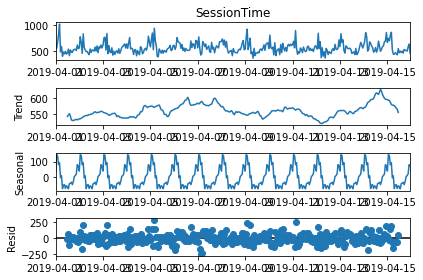

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(data_mean, model='additive', 
                            period=24)
result1.plot()
plt.show()

<AxesSubplot:xlabel='Time Stamp'>

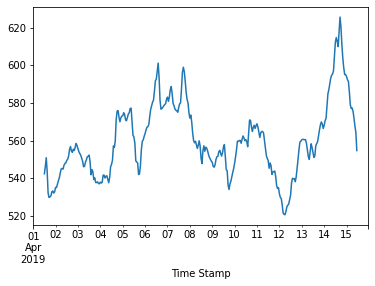

In [14]:
result1.trend.plot()

<AxesSubplot:xlabel='Time Stamp'>

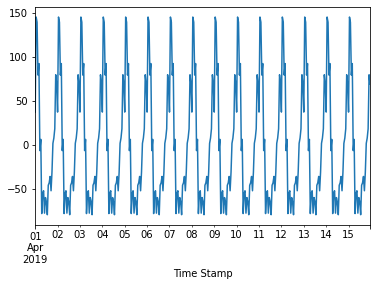

In [15]:
result1.seasonal.plot()

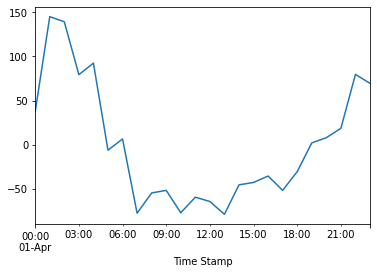

In [16]:
result1.seasonal[:24].plot()
plt.show()

#### 가장 session이 많은 유저 분석
- 가장 Session의 개수가 많은 유저는 누구인가? 

In [17]:
data_session.KMID.value_counts().index[0]

'KM01011'

- 해당 유저의 데이터를 추출하고 위에서 한 것과 같이 Session ID 변수 생성 후 Time Stamp를 index로 설정

In [19]:
data_id = data_session[data_session.KMID=='KM01011']

- 시간 단위의 session time의 합계 계산

In [20]:
data_user=data_id.resample('H')['SessionTime'].mean().fillna(0)

- 위에서 계산한 시간 단위의 session time의 합계를 사용하여 시계열 분해

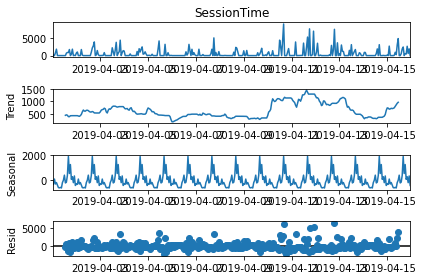

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result2 = seasonal_decompose(data_user, model='additive', 
                            period=24)
result2.plot()
plt.show()

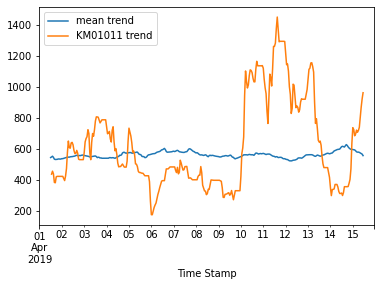

In [22]:
result1.trend.plot() ## 평균 트랜드
result2.trend.plot() ## 개인의 시간별 평균
plt.legend(['mean trend','KM01011 trend'])
plt.show()

- 위의 분해 시계열에서 추세를 추출하고 이를 사용하여 이동평균(window=10)과 지수평활(alpha=0.2)를 계산하여 추세와 함께 그래프 프린트 

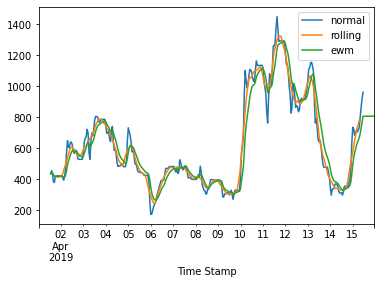

In [23]:
result2.trend.plot() ## 개인의 시간별 평균
result2.trend.rolling(10,center=True).mean().plot()
result2.trend.ewm(alpha=0.2, adjust=False).mean().plot()
plt.legend(['normal','rolling','ewm'])
plt.show()

In [24]:
trend_id= pd.DataFrame({
    'trend':result2.trend,
    'MA10':result2.trend.rolling(10,center=True).mean(),
    'EWM0.2':result2.trend.ewm(alpha=0.2, adjust=False).mean()
})

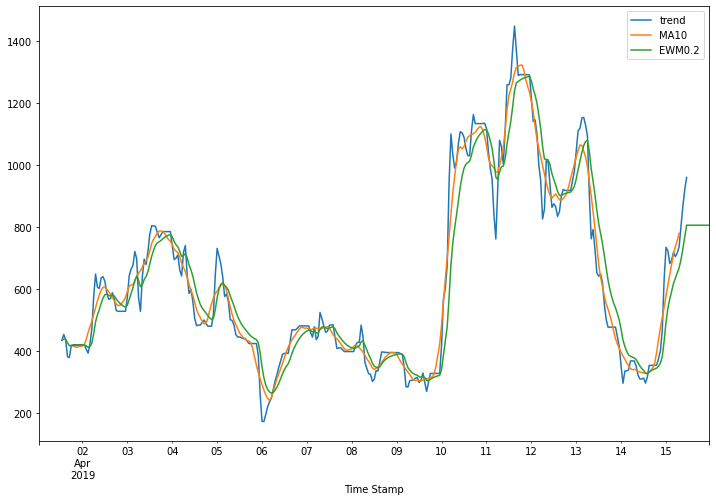

In [25]:
trend_id.plot(figsize=(12,8))
plt.show()

#### 쇼핑 로그 분석
- Full Title에 '쇼핑'이란 단어가 포함된 데이터를 추출하여 저장 

In [26]:
data_shopping = data.loc[data['Full Title'].str.contains('쇼핑')]

- 요일별 전체 로그 개수를 bar graph로 표현

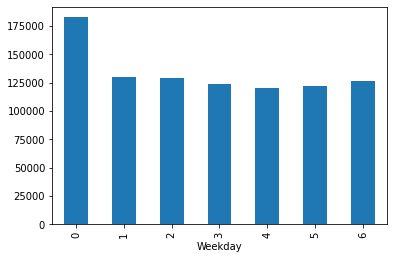

In [27]:
data.groupby('Weekday').size().plot.bar()
plt.show()

- 요일별 쇼핑로그의 개수를 bar graph로 프린트

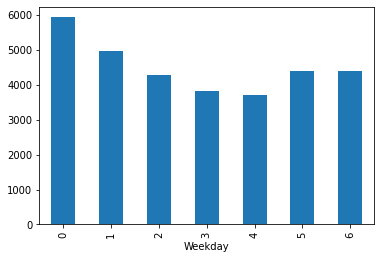

In [28]:
data_shopping.groupby('Weekday').size().plot.bar()
plt.show()

- 요일별 쇼핑로그의 비율(분모: 요일별 전체 로그 개수)를 bar graph로 프린트

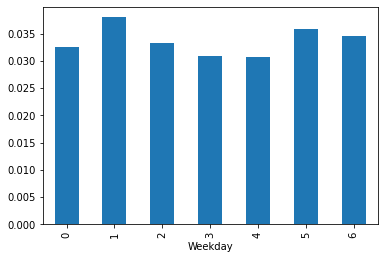

In [29]:
data_shopping.groupby('Weekday').size().div(data.groupby('Weekday').size()).plot.bar()
plt.show()

- 요일별 session time의 평균을 bar graph로 표현 

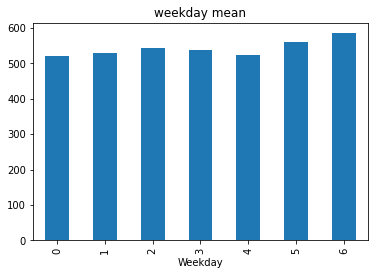

In [30]:
data_session.groupby('Weekday')['SessionTime'].mean().plot.bar()
plt.title('weekday mean')
plt.show()